In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [5]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

# and save the label in a column called 'y' in df.
df['y'] = data.target ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
#How many samples and features are there?
sample, features = df.shape
# YOUR CODE HERE
print('number of samples:', str(sample), 'number of features:', str(features-1))

number of samples: 178 number of features: 14


In [19]:
# Quiz Q1
# How many instances are there for each class? 
classData = df['y']
classData.value_counts()
# YOUR CODE HERE


1    71
0    59
2    48
Name: y, dtype: int64

In [26]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
print("\nMEANS \n", np.mean(df, axis=0))
print("\nMEDIANS \n", np.median(df, axis=0))
print("\nSTANDARD DEVIATION \n", np.std(df, axis=0))


MEANS 
 alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
y                                 0.938202
dtype: float64

MEADIANS 
 [1.305e+01 1.865e+00 2.360e+00 1.950e+01 9.800e+01 2.355e+00 2.135e+00
 3.400e-01 1.555e+00 4.690e+00 9.650e-01 2.780e+00 6.735e+02 1.000e+00]

STANDARD DEVIATION 
 alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                

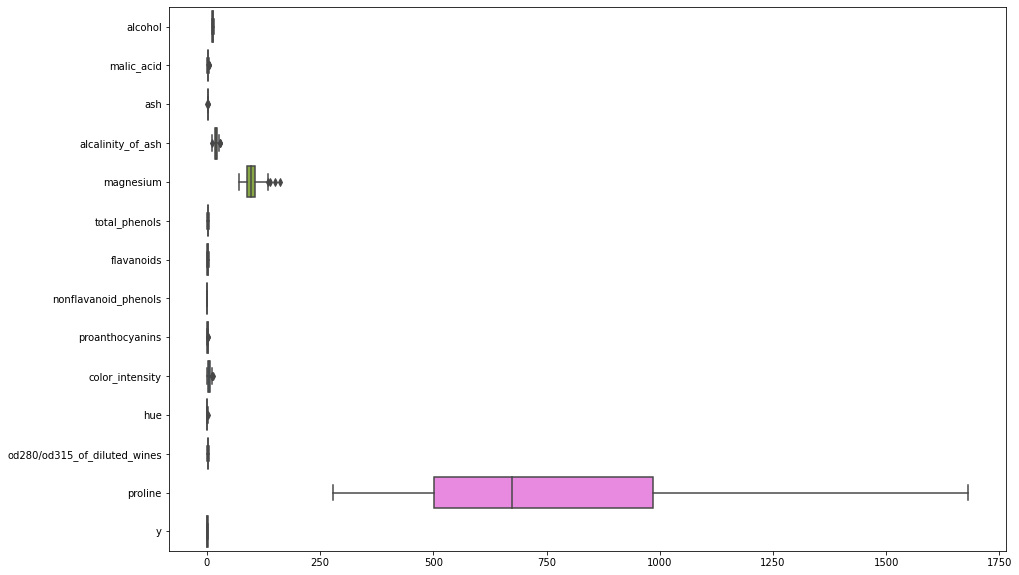

In [59]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
bx = sns.boxplot(data=df, orient="h")
from matplotlib import rcParams

rcParams['figure.figsize'] = 25, 10

# YOUR CODE HERE

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

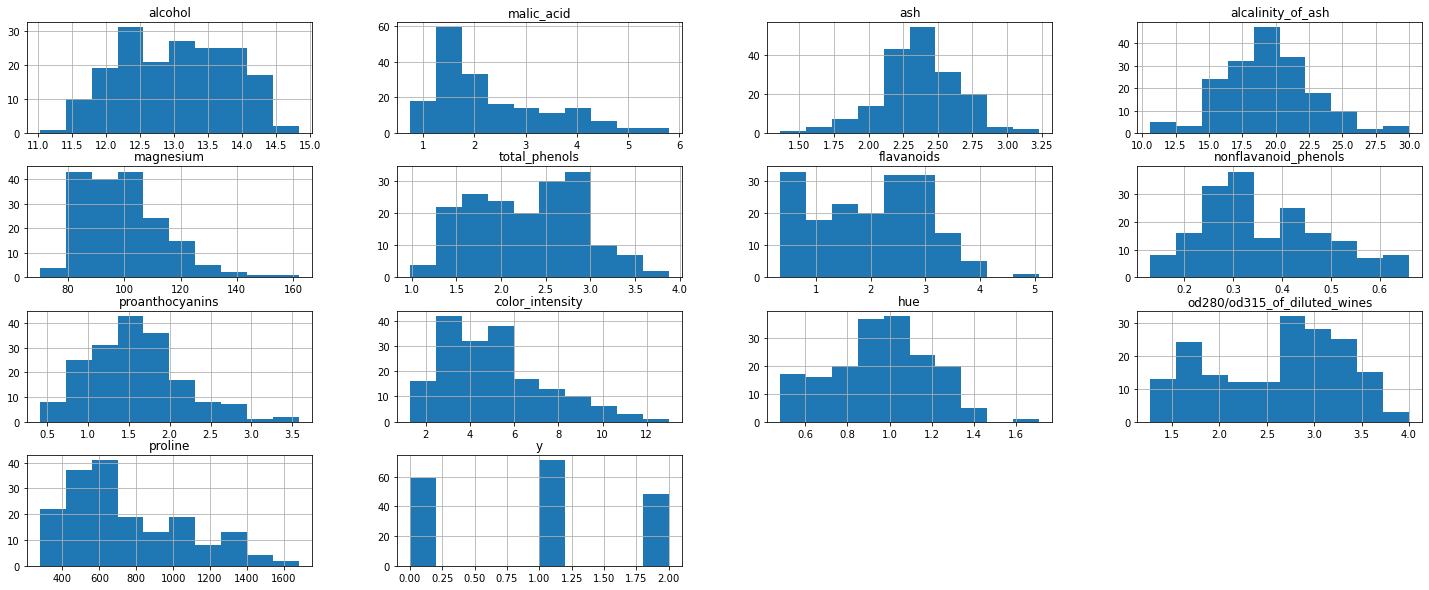

In [61]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
#sns.histplot(data=df, binwidth=3, multiple="stack")

df.hist()
#labels = ["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium"]
#g = sns.FacetGrid(df, row=labels)
#g.map(plt.hist, 'value')
# YOUR CODE HERE

Let's do some multivariate analysis

<AxesSubplot:>

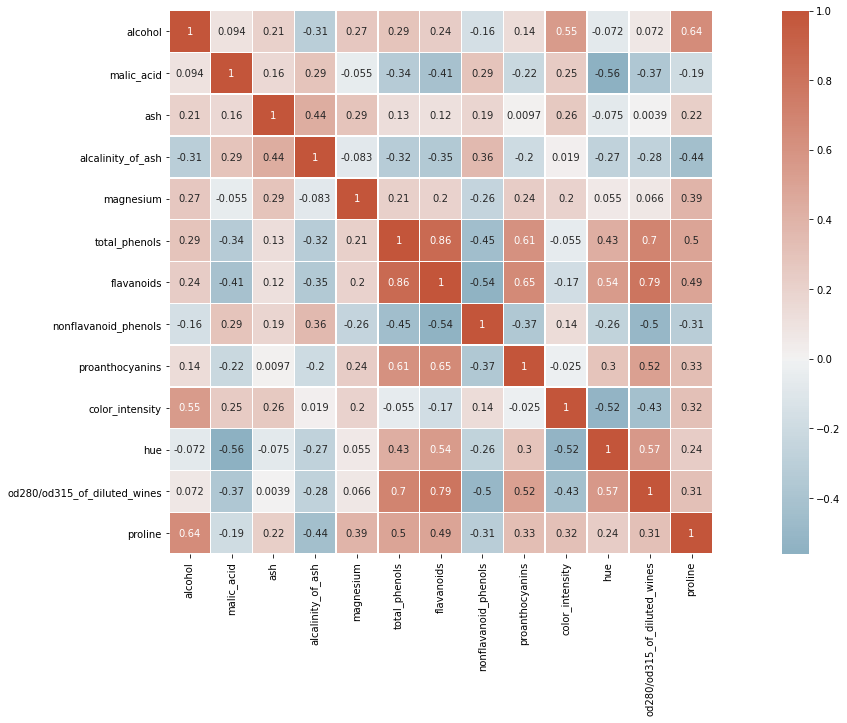

In [77]:
# Calculate the correlations between each pair of variables
#print(df.corr())
# YOUR CODE HERE
dfNoTarget = df.drop(['y'], axis = 1)

sns.heatmap(dfNoTarget.corr(), annot=True ,center=0, square=True, linewidths=.5, cmap=sns.diverging_palette(230, 20, as_cmap=True))
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE

In [ ]:
# What is the highest correlation between features?
flavanoids & total_phenols


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!